## Import Packages & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
#machin learning algorithms 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Data Information

In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handle Missing Values

In [10]:
missed_gender_percentage = (df.Gender.isnull().sum()/df.shape[0])*100
print('Totle missing values ',df.Gender.isnull().sum())
print('gender information missing (in %)',missed_gender_percentage)
df['Gender'].value_counts()

Totle missing values  13
gender information missing (in %) 2.1172638436482085


Male      489
Female    112
Name: Gender, dtype: int64

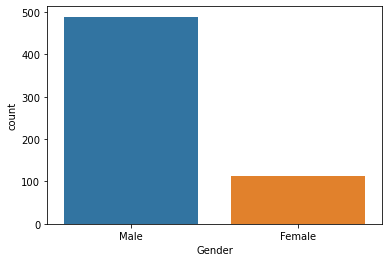

In [11]:
sns.countplot(x=df['Gender'])

Here the ratio of Male applicants is grater than the female so we will replace missing values with MALE

In [12]:
## pd.crosstab(df.Gender, [df.Married,df.Dependents], rownames=['Gender'], colnames=['Married','Dependents'])

In [13]:
df['Gender'].fillna(value='Male',inplace=True)
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [14]:
missed_Married_percentage = (df.Married.isnull().sum()/df.shape[0])*100
print('Totle Married missing values ',df.Married.isnull().sum())
print('Married information missing (in %)',missed_Married_percentage)
df['Married'].value_counts()

Totle Married missing values  3
Married information missing (in %) 0.4885993485342019


Yes    398
No     213
Name: Married, dtype: int64

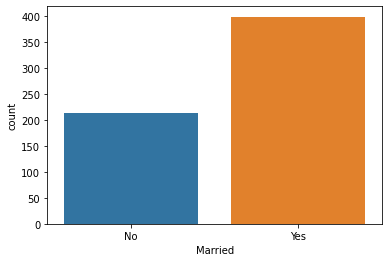

In [15]:
sns.countplot(x=df['Married'])

In [16]:
df['Married'].fillna(value='Yes',inplace=True)
df['Self_Employed'].isnull().sum()

32

Totle Dependents missing values  15
Dependents information missing (in %) 2.44299674267101


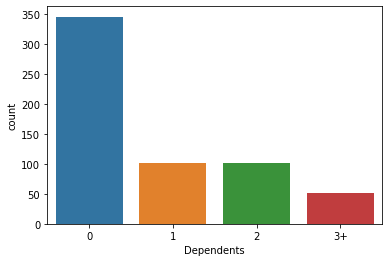

In [17]:
missed_Dependents_percentage = (df.Dependents.isnull().sum()/df.shape[0])*100
print('Totle Dependents missing values ',df.Dependents.isnull().sum())
print('Dependents information missing (in %)',missed_Dependents_percentage)

sns.countplot(x=df['Dependents'])

In [18]:
df['Dependents'].fillna(value='0',inplace=True)
df['Self_Employed'].isnull().sum()

32

Totle Self_Employed missing values  32
Self_Employed information missing (in %) 5.211726384364821


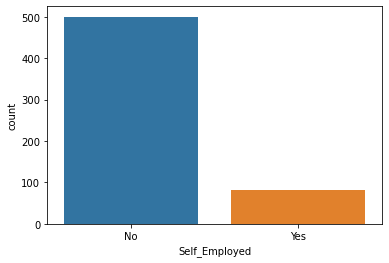

In [19]:
missed_Self_Employed_percentage = (df.Self_Employed.isnull().sum()/df.shape[0])*100
print('Totle Self_Employed missing values ',df.Self_Employed.isnull().sum())
print('Self_Employed information missing (in %)',missed_Self_Employed_percentage)

sns.countplot(x=df['Self_Employed'])

In [20]:
df['Self_Employed'].fillna(value='No',inplace=True)
df['Self_Employed'].isnull().sum()

0

In [21]:
missed_LoanAmount_percentage = (df.LoanAmount.isnull().sum()/df.shape[0])*100
print('Totle LoanAmount missing values ',df.LoanAmount.isnull().sum())
print('LoanAmount information missing (in %)',missed_LoanAmount_percentage)

Totle LoanAmount missing values  22
LoanAmount information missing (in %) 3.5830618892508146


[Text(0.5, 0, 'Loan Amount')]

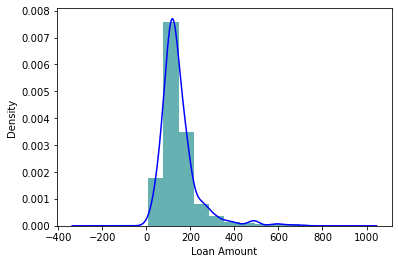

In [22]:
ax = df["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
df["LoanAmount"].plot(kind='density', color='blue')
ax.set(xlabel='Loan Amount')

In [23]:
df['LoanAmount'].fillna(df["LoanAmount"].mean(skipna=True), inplace=True)

In [24]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

Totle Loan_Amount_Term missing values  14
Loan_Amount_Term information missing (in %) 2.2801302931596092
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


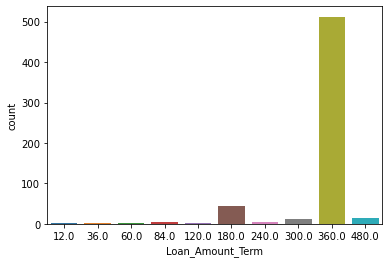

In [25]:
missed_Loan_Amount_Term_percentage = (df.Loan_Amount_Term.isnull().sum()/df.shape[0])*100
print('Totle Loan_Amount_Term missing values ',df.Loan_Amount_Term.isnull().sum())
print('Loan_Amount_Term information missing (in %)',missed_Loan_Amount_Term_percentage)
print(df['Loan_Amount_Term'].value_counts())
sns.countplot(x=df['Loan_Amount_Term'])

In [26]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True) #idxmax for most repeted

Totle Credit_History missing values  50
Credit_History information missing (in %) 8.143322475570033
1.0    475
0.0     89
Name: Credit_History, dtype: int64
[ 1.  0. nan]


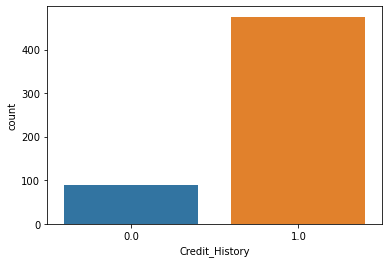

In [27]:
missed_Credit_History_percentage = (df.Credit_History.isnull().sum()/df.shape[0])*100
print('Totle Credit_History missing values ',df.Credit_History.isnull().sum())
print('Credit_History information missing (in %)',missed_Credit_History_percentage)
print(df['Credit_History'].value_counts())
print(df.Credit_History.unique())
sns.countplot(x=df['Credit_History']) 

In [28]:
df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace=True)

In [29]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Data Conversion

In [31]:
df2 = df 

In [32]:
gender_stat = {'Female': 0, 'Male': 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2} 

df2['Gender'] = df2['Gender'].replace(gender_stat)
df2['Married'] = df2['Married'].replace(yes_no_stat)
df2['Dependents'] = df2['Dependents'].replace(dependents_stat)
df2['Education'] = df2['Education'].replace(education_stat)
df2['Self_Employed'] = df2['Self_Employed'].replace(yes_no_stat)
df2['Property_Area'] = df2['Property_Area'].replace(property_stat)
df2['Loan_Status'] = df2['Loan_Status'].replace(yes_no_stat)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [34]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,N
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y


## Machine learning Starts from here

In [35]:
#Separate feature and target
x = df2.iloc[:,1:12]
y = df2.iloc[:,12]

score = []

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Support Vector Machine

*Accuracy score for SVM:  70.44334975369459 

*Confusion Matrix for SVM: 
[[ 18  54]
 [  6 125]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           N       0.75      0.25      0.38        72
           Y       0.70      0.95      0.81       131

    accuracy                           0.70       203
   macro avg       0.72      0.60      0.59       203
weighted avg       0.72      0.70      0.65       203

[[ 18  54]
 [  6 125]]


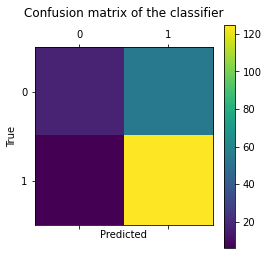

In [37]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

plt.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

In [38]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
from sklearn import metrics
SVM_sensitivity = ((TP / float(FN + TP))) * 100

print(SVM_sensitivity)
SVM_specificity = (((TN / (TN + FP)))) * 100

print(SVM_specificity)

0.2955665024630542
75.0
69.83240223463687


# Gradient Boosting Classifier

*Accuracy score for GBC:  76.35467980295566 

*Confusion Matrix for GBC: 
[[ 31  41]
 [  7 124]]
*Classification Report for GBC: 
              precision    recall  f1-score   support

           N       0.82      0.43      0.56        72
           Y       0.75      0.95      0.84       131

    accuracy                           0.76       203
   macro avg       0.78      0.69      0.70       203
weighted avg       0.77      0.76      0.74       203

[[ 31  41]
 [  7 124]]


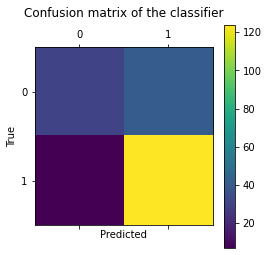

In [39]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
predictions = GBC.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for GBC: ", val2, "\n")
print("*Confusion Matrix for GBC: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for GBC: ")
print(classification_report(y_test, predictions))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

plt.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

In [40]:

TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
from sklearn import metrics
GBC_sensitivity =( (TP / float(FN + TP))) * 100

print(GBC_sensitivity)
GBC_specificity = (((TN / (TN + FP)))) * 100

print(GBC_specificity)

0.23645320197044334
81.57894736842105
75.15151515151514


# Random Forest Classifier

*Accuracy score for RF:  77.33990147783251 

*Confusion Matrix for RF: 
[[ 35  37]
 [  9 122]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           N       0.80      0.49      0.60        72
           Y       0.77      0.93      0.84       131

    accuracy                           0.77       203
   macro avg       0.78      0.71      0.72       203
weighted avg       0.78      0.77      0.76       203

[[ 35  37]
 [  9 122]]


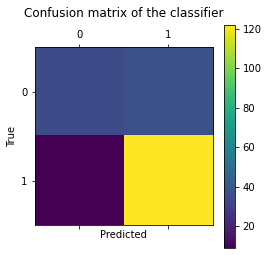

In [41]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val3, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

plt.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

In [42]:


TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP))) * 100

print(RF_sensitivity)
RF_specificity =( ((TN / (TN + FP)))) * 100

print(RF_specificity)

0.22660098522167488
79.54545454545455
76.72955974842768


# Decision Tree Classifier

*Accuracy score for DT:  69.45812807881774 

*Confusion Matrix for DT: 
[[ 36  36]
 [ 26 105]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           N       0.58      0.50      0.54        72
           Y       0.74      0.80      0.77       131

    accuracy                           0.69       203
   macro avg       0.66      0.65      0.65       203
weighted avg       0.69      0.69      0.69       203

[[ 36  36]
 [ 26 105]]
0.6945812807881774


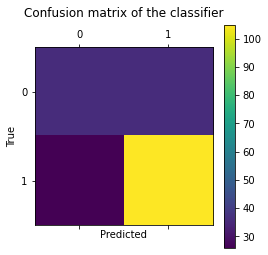

In [43]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for DT: ", val4, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
print(accuracy_score(y_test, predictions))

plt.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

In [44]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP))) * 100

print(DT_sensitivity)
DT_specificity = (((TN / (TN + FP)))) * 100

print(DT_specificity)

0.3054187192118227
58.06451612903226
74.46808510638297


# KNeighbors Classifier

*Accuracy score for KNN:  56.65024630541872 

*Confusion Matrix for KNN: 
[[  8  64]
 [ 24 107]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           N       0.25      0.11      0.15        72
           Y       0.63      0.82      0.71       131

    accuracy                           0.57       203
   macro avg       0.44      0.46      0.43       203
weighted avg       0.49      0.57      0.51       203

[[  8  64]
 [ 24 107]]


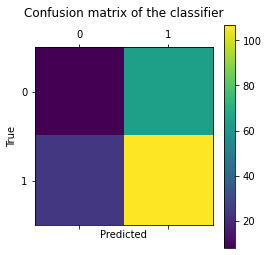

In [45]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val5, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

plt.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

In [46]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP))) *100

print(KNN_sensitivity)
KNN_specificity = (((TN / (TN + FP)))) * 100

print(KNN_specificity)

0.43349753694581283
25.0
62.57309941520468


## Comparison

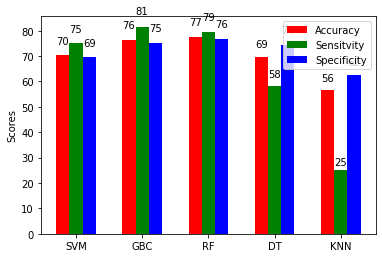

In [47]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val1,val2,val3,val4,val5]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [SVM_sensitivity,GBC_sensitivity,RF_sensitivity,DT_sensitivity,KNN_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [SVM_specificity,GBC_specificity,RF_specificity,DT_specificity,KNN_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('SVM','GBC','RF','DT','KNN') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

# Accuracy

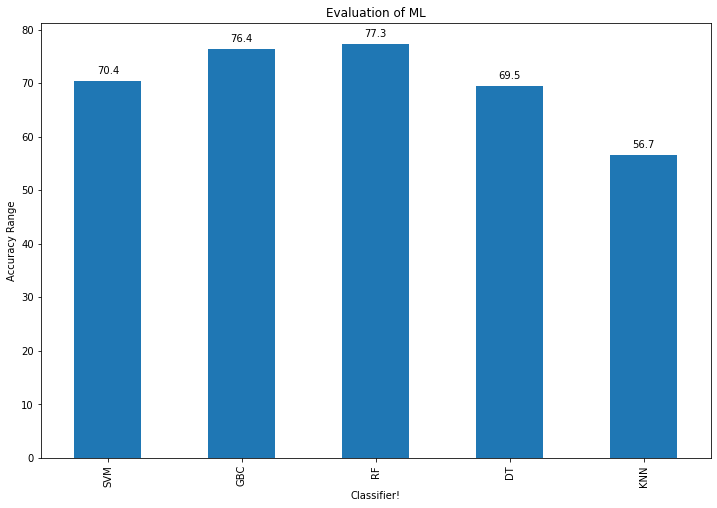

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [val1,val2,val3,val4,val5]


freq_series = pd.Series(frequencies)

x_labels = ['SVM','GBC','RF','DT','KNN']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. 
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

# Sensitivity

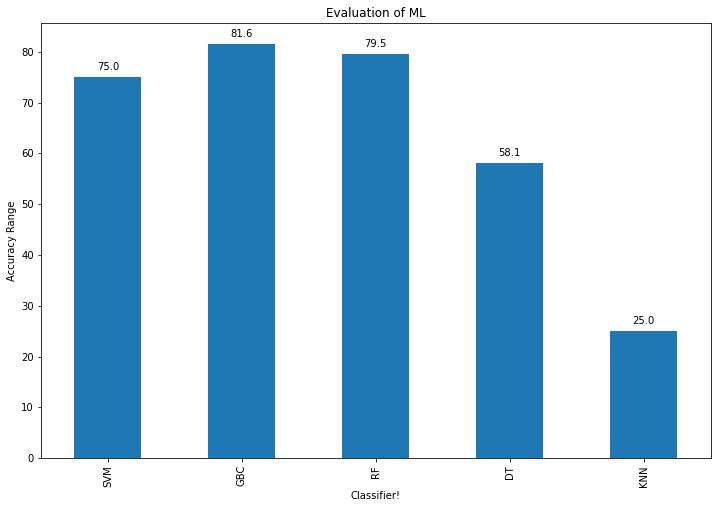

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [SVM_sensitivity,GBC_sensitivity,RF_sensitivity,DT_sensitivity,KNN_sensitivity]


freq_series = pd.Series(frequencies)

x_labels = ['SVM','GBC','RF','DT','KNN']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

# Specifivity

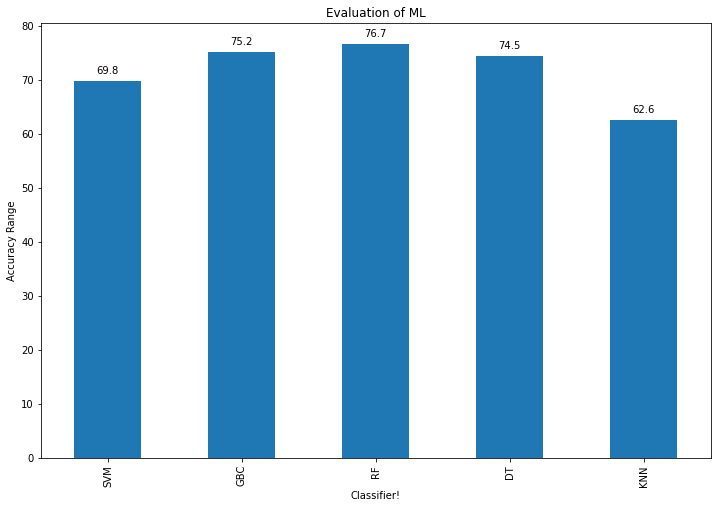

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [SVM_specificity,GBC_specificity,RF_specificity,DT_specificity,KNN_specificity]


freq_series = pd.Series(frequencies)

x_labels = ['SVM','GBC','RF','DT','KNN']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")